## Factoriales análisis

En este notebook he decidido buscar ineficiencias y posibles mejoras en los problemas de los factoriales. Analizaré el cálculo de la suma de los factoriales de los primeros **n** números naturales. 

## Herramientas y fuentes

Utilizaré la de "profiling" para analizar el siguiente parte de código que es ineficiente e intentaré buscar cual es el cuello de botella. La ventaha de hacer el profiling es que podemos ver en cada parte del código, el tiempo empleado y así detectar las inficiencias más facilmente.

La fuente código usada en cuestion ha sido extraída de:
https://stackoverflow.com/questions/28727548/python-sum-of-the-factorials

In [1]:
# Instalo line_profiler
# %pip install line_profiler

In [2]:
# Se recarga la extensión en el notebook.
%reload_ext line_profiler

## Función factorial basada en el link

In [3]:
def factorial_sum(n: int):
    """Devuelve las suma de los factoriales de los primeros n números naturales. 

    Argumentos:
        n (int): Entero positivo indicando el límite superior

    Devuelve:
        (int): Suma de factoriales desde  1! hasta n!.
    """
    total = 0
    for i in range(1, n + 1):
        fact = 1
        for j in range(1, i + 1):
            fact *= j
        total += fact
    return total

In [4]:
%time factorial_sum(350)
print()
%timeit factorial_sum(350)
print()
from line_profiler import LineProfiler

lp = LineProfiler()
lp.add_function(factorial_sum)
lp.run('factorial_sum(350)')
lp.print_stats()

CPU times: total: 15.6 ms
Wall time: 11.2 ms

6.18 ms ± 650 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Timer unit: 1e-07 s

Total time: 0.106131 s
File: C:\Users\willi\AppData\Local\Temp\ipykernel_17404\2468286928.py
Function: factorial_sum at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def factorial_sum(n: int):
     2                                               """Devuelve las suma de los factoriales de los primeros n números naturales. 
     3                                           
     4                                               Argumentos:
     5                                                   n (int): Entero positivo indicando el límite superior
     6                                           
     7                                               Devuelve:
     8                                                   (int): Suma de factoriales desde  1! hasta n!.
     9              

$O(n^2)$: Es ineficiente porque utiliza dos bucles anidados; para cada número, recalcula el factorial desde cero. El tiempo de ejecución crece de forma cuadrática respecto a $n$.

**Conclusión**

Usando la line_profiler podemos ver donde se utilizan más recursos. Solo el bucle interno suma un total 99,1 de los cuales 53,6% proviene de la multiplicación, y el 45,5% del bucle "for j in range(1, i+1). A simple vista, se podría decir que prescindir de uno de los bucles, ayudaría al rendimiento. Importante es ver el número de "hits", donde el valor es muy alto.

## Función factorial usando recursividad

A continuación usaré la recursividad para intentar reducir el tiempo de ejecución.

In [5]:
# Solución usando recursividad

def factorial_recursiva(n):
    if n == 1:
        return 1
    return n * factorial_recursiva(n - 1)


def factorial_suma_recursiva(n):
    if n == 1:
        return 1
    return factorial_suma_recursiva(n - 1) + factorial_recursiva(n)

# factorial_suma_recursiva(350)

In [6]:
%time factorial_suma_recursiva(350)
%timeit factorial_suma_recursiva(350)

from line_profiler import LineProfiler

lp = LineProfiler()
lp.add_function(factorial_suma_recursiva)
lp.run('factorial_suma_recursiva(350)')
lp.print_stats()

CPU times: total: 31.2 ms
Wall time: 28.8 ms
19.6 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Timer unit: 1e-07 s

Total time: 0.0004619 s
File: C:\Users\willi\AppData\Local\Temp\ipykernel_17404\3316744935.py
Function: factorial_suma_recursiva at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           def factorial_suma_recursiva(n):
    10       350       2176.0      6.2     47.1      if n == 1:
    11         1         12.0     12.0      0.3          return 1
    12       349       2431.0      7.0     52.6      return factorial_suma_recursiva(n - 1) + factorial_recursiva(n)



$O(n^2)$: Aunque usa recursividad, mantiene una estructura cuadrática al realizar $n$ llamadas recursivas que a su vez calculan factoriales individuales. Además, consume más memoria por la pila de llamadas.

**Conclusión con factorial recursivo**

* Para la solución anterior he utilizado el método de recursividad. Se puede que la distribución del %time sigo siendo parecida a la anterior, pero con una gran ventaja. Vemos que el número de "hits" es mucho menor. Otro detalle a tener en cuenta es, %timeit ha podido esta vez realidad "7 runs con 10000 loops", indicando una eficiencia mucho mayor a la anterior con "7 runs con 100 loops".
* Conclusión: se ha mejorado el código comparado al original.
* A modo de interés he probado dos códigos más, para evaluar que solución sería la más adecuada.


## Función factorial original con un bucle menos

A continuación he probado una solución similar a la original, pero esta vez eliminando uno de los bucles.

In [7]:
# Posible solución usando un bucle menos.
def factorial_suma_bucle_menos(n):
    total = 0
    factorial = 1
    for i in range(1, n+1):
        factorial *= i
        total += factorial
    return total

# factorial_suma_bucle_menos(350)

In [8]:
%time factorial_suma_bucle_menos(350)
%timeit factorial_suma_bucle_menos(350)

from line_profiler import LineProfiler

lp = LineProfiler()
lp.add_function(factorial_suma_bucle_menos)
lp.run('factorial_suma_bucle_menos(350)')
lp.print_stats()

CPU times: total: 0 ns
Wall time: 270 μs
103 μs ± 3.42 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Timer unit: 1e-07 s

Total time: 0.0005947 s
File: C:\Users\willi\AppData\Local\Temp\ipykernel_17404\1738937859.py
Function: factorial_suma_bucle_menos at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def factorial_suma_bucle_menos(n):
     3         1          9.0      9.0      0.2      total = 0
     4         1          5.0      5.0      0.1      factorial = 1
     5       351       1804.0      5.1     30.3      for i in range(1, n+1):
     6       350       2169.0      6.2     36.5          factorial *= i
     7       350       1948.0      5.6     32.8          total += factorial
     8         1         12.0     12.0      0.2      return total



**Conclusión con factorial un bucle menos**

* La solución con un bucle menos, da unos resultados mejores de lo que esperaba. Incluso un poco mejor que la solución recursiva. Podemos ver una mejor distribución porcentajes tiempos en 3 operaciones. El bucle, la multiplicación y la suma acumuladora. También se observa que se han podido realizar "7 runs" con "10000 loops". Similar a la solución recursiva.
* Conclusión: se mejora el tiempo de ejecución frente a la propuesta original.
* Por último conociendo que existe la función factorial el módulo math, me he decidido a probarla :)

$O(n)$: Es la opción óptima. Solo recorre el rango una vez, aprovechando el factorial calculado en la iteración anterior para obtener el siguiente.

## Función factorial módulo math

Por último, pasaremos a utilizar la función factorial del módulo math.

In [9]:
import math

def factorial_math(n):
    total = 0
    for i in range(1, n + 1):
        total += math.factorial(i)
    return total

In [10]:
%time factorial_math(350)
%timeit factorial_math(350)

# Profiling tool no funciona en este caso, explicación abajo
from line_profiler import LineProfiler
lp = LineProfiler()
lp.add_function(factorial_math)
lp.run('factorial_math(350)')
lp.print_stats()

CPU times: total: 0 ns
Wall time: 1.48 ms
1.08 ms ± 25.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Timer unit: 1e-07 s

Total time: 0.001644 s
File: C:\Users\willi\AppData\Local\Temp\ipykernel_17404\2673708506.py
Function: factorial_math at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def factorial_math(n):
     4         1         11.0     11.0      0.1      total = 0
     5       351       2507.0      7.1     15.2      for i in range(1, n + 1):
     6       350      13905.0     39.7     84.6          total += math.factorial(i)
     7         1         17.0     17.0      0.1      return total



**Conclusión con factorial módulo math**

Aunque math.factorial es una función altamente optimizada, su uso repetido dentro de un bucle provoca un coste acumulado significativo. En este contexto, no resulta la opción más eficiente para calcular la suma de factoriales.

Calcula n factoriales de tamaño creciente, por lo que la complejidad temporal es O(n²).

## Comprobación de resultados

In [11]:
def comprobar_resultados(n):
    resultados = {
        "factorial_sum": factorial_sum(n),
        "factorial_suma_bucle_menos": factorial_suma_bucle_menos(n),
        "factorial_math": factorial_math(n),
        "factorial_suma_recursiva": factorial_suma_recursiva(n)
    }

    for nombre, valor in resultados.items():
        print(f"{nombre}: {valor}")

    return len(set(resultados.values())) == 1


In [12]:
comprobar_resultados(20)

factorial_sum: 2561327494111820313
factorial_suma_bucle_menos: 2561327494111820313
factorial_math: 2561327494111820313
factorial_suma_recursiva: 2561327494111820313


True

# Visualización

In [13]:
def profile_total_time(func, n):
    lp = LineProfiler()
    lp.add_function(func)
    lp.enable()
    func(n)
    lp.disable()

    stats = lp.get_stats()

    total_time = 0.0
    for timings in stats.timings.values():
        for line in timings:
            total_time += line[2]  # para ver microsegundos

    return total_time / 1e6  # para ver en segundos


In [17]:
functions = {
    "factorial_sum": factorial_sum,
    "factorial_suma_recursiva": factorial_suma_recursiva,
    "factorial_suma_bucle_menos": factorial_suma_bucle_menos,
    "math.factorial": factorial_math
}

# n_values = [20, 25, 30, 35, 40, 45, 50]
n_values = [50, 100, 200, 400, 600, 1200, 2400]

results = {name: [] for name in functions}

for n in n_values:
    for name, func in functions.items():
        results[name].append(profile_total_time(func, n))


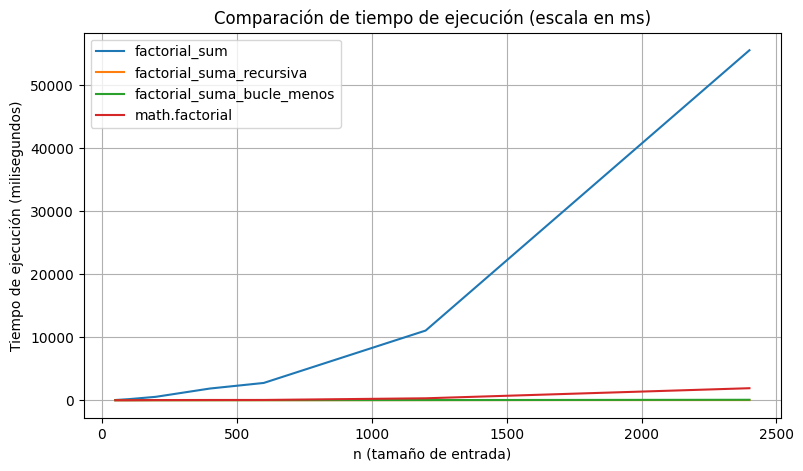

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

for name, times in results.items():
    times_ms = [t * 1000 for t in times]  # segundos → milisegundos
    plt.plot(n_values, times_ms, label=name)

plt.xlabel("n (tamaño de entrada)")
plt.ylabel("Tiempo de ejecución (milisegundos)")
plt.title("Comparación de tiempo de ejecución (escala en ms)")
plt.legend()
plt.grid(True)

plt.show()


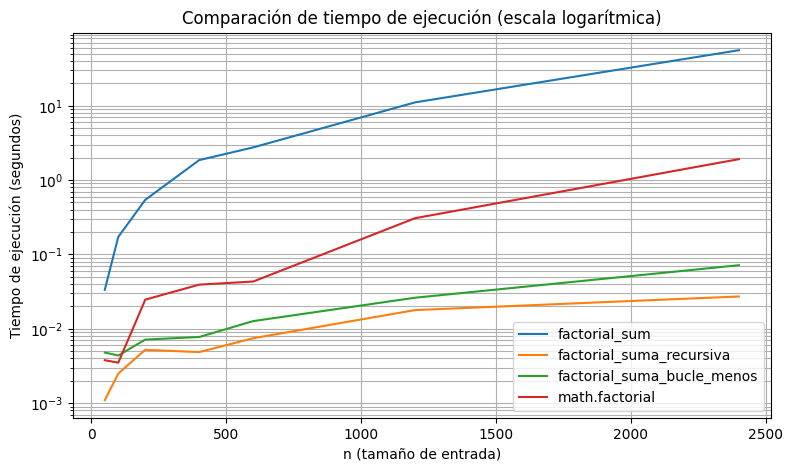

In [19]:
plt.figure(figsize=(9, 5))

for name, times in results.items():
    plt.plot(n_values, times, label=name)

plt.xlabel("n (tamaño de entrada)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.yscale("log")
plt.title("Comparación de tiempo de ejecución (escala logarítmica)")
plt.legend()
plt.grid(True, which="both")

plt.show()


Tras el análisis de las diferentes soluciones para el cálculo de la suma de factoriales, se observa que la versión basada en bucles anidados (la original) presenta el peor rendimiento debido a su complejidad cuadrática. El uso de math.factorial de la librería math reduce significativamente el coste constante, pero no evita el crecimiento cuadrático al calcular repetidamente factoriales independientes. La implementación factorial_mejorado, que reutiliza el factorial calculado en cada iteración, es la única que alcanza complejidad lineal O(n), siendo además la más eficiente en la práctica. Los resultados obtenidos mediante line_profiler y su representación gráfica confirman estas conclusiones.